# Performance of Two Regression Models of the Seoul Apartment Price Dataset

![photo by Quang Nguyen Vinh](https://github.com/ghhenrisar/Regression-Model-for-Seoul-Apartment-Price/raw/e56198bf6776f544d8398fa6c67feb872cc06ab7/images/pexels-photo-21624423.jpg)*photo by Quang Nguyen Vinh*

There are some models for prediction of house price nowadays. Regression is often utilized for this purporse. It is a part of statistical tools to find the relationship between independent variable (X) and dependent variable (y). Regression is a part of machine learning because it is a supervised learning to predict value.
As I hope this project is as simplest as possible, scores of the models will be the goal of this project to get a brief understanding of the performance of the two models below.

# 1. Linear Regression
The technique to find the linear relationship between X and y is called Linear Regression. The following libraries will be imported. <span style="color:blue">%matplotlib inline</span> is used to show the graph here. Dataset **SeoulRealEstate.csv** which is used to demonstrate this regression technique below is provided by [Kaggle](https://www.kaggle.com).

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
df = pd.read_csv('seoul - SeoulRealEstate.csv')
df.head()

,id,lat,lng,households,buildDate,score,m2,p,min_sales,max_sales,avg_sales
0,2766,37.681604,127.056592,492,200006,4.3,139,42,60100.0,62000.0,61000.0
1,5860,37.679290,127.057021,468,200105,4.1,105,32,48600.0,52200.0,51000.0
2,15564,37.676882,127.058075,57,200502,4.8,86,26,36000.0,46000.0,40500.0
3,3700,37.675277,127.060001,216,199509,4.8,102,31,34000.0,34800.0,34500.0
4,6204,37.676381,127.058361,165,200306,4.8,91,28,27900.0,50300.0,40000.0


After passing the SeoulRealEstate dataset to DataFrame df, we can take a look on the data first.

### Column Names
- **lat**: Latitude  
- **lng**: Longitude  
- **households**: Number of households in residence  
- **buildDate**: Date the apartment was built  
- **score**: Total evaluation, maximum 5 stars  
- **m2**: The area of a house(m^2)  
- **p**: Number of floors  
- **minsales, maxsales, avg_sales**: Descriptive statistics of sales price

### Data Preprocessing

In [5]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4021 entries, 0 to 4020
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          4021 non-null   int64  
 1   lat         4021 non-null   float64
 2   lng         4021 non-null   float64
 3   households  4021 non-null   int64  
 4   buildDate   4021 non-null   int64  
 5   score       4021 non-null   float64
 6   m2          4021 non-null   int64  
 7   p           4021 non-null   int64  
 8   min_sales   3931 non-null   float64
 9   max_sales   3931 non-null   float64
 10  avg_sales   3931 non-null   float64
dtypes: float64(6), int64(5)
memory usage: 345.7 KB


id             0
lat            0
lng            0
households     0
buildDate      0
score          0
m2             0
p              0
min_sales     90
max_sales     90
avg_sales     90
dtype: int64

The data obtained sometimes is quite raw with null values which is an issue for data processing. Cleaning of data is required and dropna function is called to delete the rows with null values.

In [4]:
df['avg_sales'].replace('', np.nan, inplace=True)
df.dropna(subset=['avg_sales'], inplace=True)
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3931 entries, 0 to 4020
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          3931 non-null   int64  
 1   lat         3931 non-null   float64
 2   lng         3931 non-null   float64
 3   households  3931 non-null   int64  
 4   buildDate   3931 non-null   int64  
 5   score       3931 non-null   float64
 6   m2          3931 non-null   int64  
 7   p           3931 non-null   int64  
 8   min_sales   3931 non-null   float64
 9   max_sales   3931 non-null   float64
 10  avg_sales   3931 non-null   float64
dtypes: float64(6), int64(5)
memory usage: 368.5 KB


id            0
lat           0
lng           0
households    0
buildDate     0
score         0
m2            0
p             0
min_sales     0
max_sales     0
avg_sales     0
dtype: int64

Let's preview the relationship between the data with the sales price(avg_sales). Seaborn function jointplot is useful here.

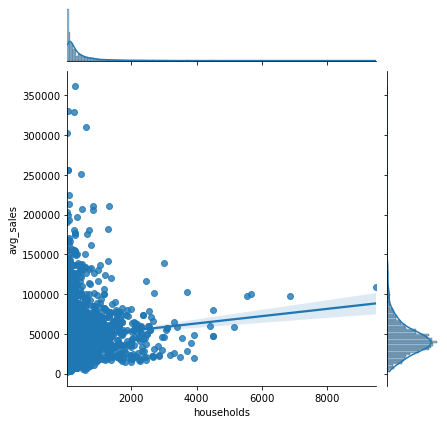

In [5]:
sns.jointplot(x=df.households, y=df.avg_sales, kind='reg')

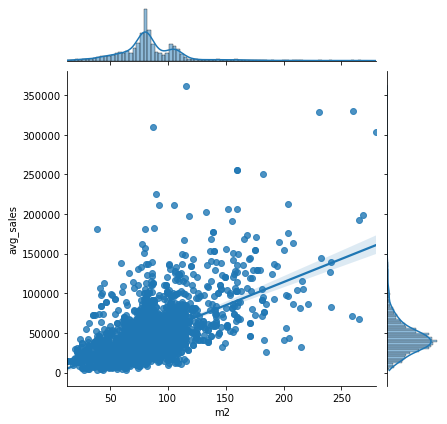

In [6]:
sns.jointplot(x=df.m2, y=df.avg_sales, kind='reg')

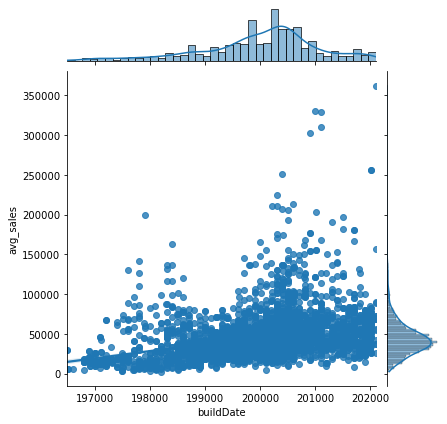

In [7]:
sns.jointplot(x=df.buildDate, y=df.avg_sales, kind='reg')

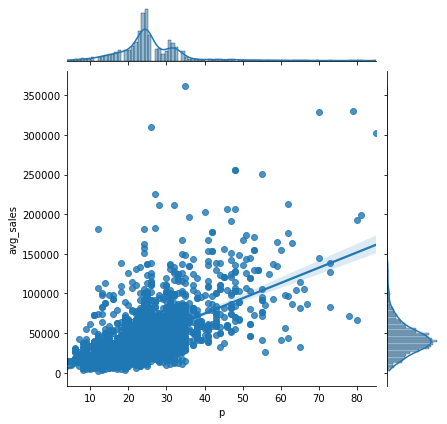

In [8]:
sns.jointplot(x=df.p, y=df.avg_sales, kind='reg')

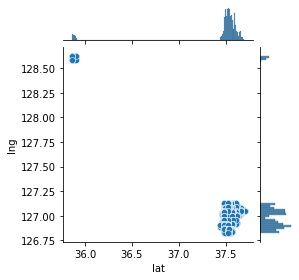

In [9]:
sns.jointplot(x=df.lat, y=df.lng, height=4)

We will split the dataset into X and y for Linear Regression.

In [10]:
y = df.avg_sales
X = df.drop(['id', 'avg_sales', 'min_sales', 'max_sales'], axis=1)

Some algorithm and regression require data scaling for good results. MinMax Scaler can transform the data from 0 to 1 without changing the shape of the data distribution.

In [11]:
from sklearn.preprocessing import MinMaxScaler
minMaxScaler = MinMaxScaler().fit(X)
X_normalized = minMaxScaler.transform(X)
df_normalized = pd.DataFrame(X_normalized, columns=X.columns)
df_normalized

,lat,lng,households,buildDate,score,m2,p
0,0.987743,0.127672,0.048734,0.625112,0.86,0.471910,0.469136
1,0.986488,0.127910,0.046203,0.642793,0.82,0.344569,0.345679
2,0.985183,0.128495,0.002848,0.713699,0.96,0.273408,0.271605
3,0.984313,0.129564,0.019620,0.536346,0.96,0.333333,0.333333
4,0.984911,0.128654,0.014241,0.678693,0.96,0.292135,0.296296
...,...,...,...,...,...,...,...
3926,0.906735,0.022327,0.038186,0.678693,0.90,0.273408,0.271605
3927,0.906486,0.001650,0.009494,0.784962,0.80,0.348315,0.345679
3928,0.906411,0.001105,0.006540,0.803001,0.70,0.262172,0.259259
3929,0.906077,0.022471,0.009388,0.678693,0.86,0.232210,0.234568


<AxesSubplot:>

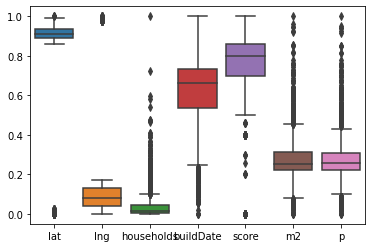

In [12]:
sns.boxplot(data=df_normalized)

Then train_test_split function is called to split the dataset for training and evaluation of the model.

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
x_train, x_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=2)

### Training
x_train and y_train are the data for training purpose.

In [15]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)

LinearRegression()

### Evaluation

In [16]:
lr_model.score(x_test, y_test)

0.4172377734948557

Finially We will see the performance of Linear Regression by using the x_test and y_test data. We got score of 0.417 which is poor. Then, how to get a better result? Well, let's try another technique.

# 2. Gradient Boosting Regressor

According to [scikit-learn.org](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html)
> Gradient Boosting builds an additive model in a forward stage-wise fashion; it allows for the optimization of arbitrary differentiable loss functions.

In [17]:
from sklearn import ensemble

In [18]:
gbr_model = ensemble.GradientBoostingRegressor(n_estimators=400, max_depth=5, min_samples_split=7, learning_rate=0.1, loss='ls')

### Parameters of GradientBoostingRegressor function
- **n_estimators**: the number of boosting stages
- **max_depth**: the depth of the tree node
- **min_samples_split**: the number of sample to be split for learning
- **learning_rate** the rate of learning
- **loss**: the loss function and 'ls' means least squares regression

In [19]:
gbr_model.fit(x_train, y_train)

GradientBoostingRegressor(max_depth=5, min_samples_split=7, n_estimators=400)

In [20]:
gbr_model.score(x_test, y_test)

0.806625059190917

### Conclusion
From the results above, Gradient Boosting did much better than Linear Regression. You can try other parameters to see if there is any improvement of the result.  
Thank you for your reading.